In [1]:
import numpy as np
import pandas as pd

In [2]:
math = pd.read_csv('./data/student-mat.csv')

math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
drop_col = ['school','sex','age','Mjob', 'Fjob','reason','guardian']
math = math.drop(columns=drop_col)

In [5]:
import numpy as np

struct_data = math.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [6]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for col in non_numeric_columns : 
    struct_data[col] = label.fit_transform(struct_data[col])
    
struct_data.head()

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,0,4,4,2,2,0,1,0,...,4,3,4,1,1,3,6,5,6,6
1,1,0,1,1,1,1,2,0,0,1,...,5,3,3,1,1,3,4,5,5,6
2,1,1,1,1,1,1,2,3,1,0,...,4,3,2,2,3,3,10,7,8,10
3,1,0,1,4,2,1,3,0,0,1,...,3,2,2,1,1,5,2,15,14,15
4,1,0,1,3,3,1,2,0,0,1,...,4,3,2,1,2,5,4,6,10,10


In [7]:
#! pip install causalnex

In [8]:
# Build a Structural Model in causelnex from pandas DataFrame
# https://www.kaggle.com/code/imzeepo/causal-graph-inference-using-causalnex
# This may take a few minutes
from causalnex.structure.notears import from_pandas

sm = from_pandas(struct_data)

In [9]:
# Instal pygraphviz
# This mayl take a few minutes
# sudo apt-get install graphviz libgraphviz-dev pkg-config
# pip install pygraphviz

In [10]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm,
    graph_attributes={"scale": "5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)

Image(viz.draw(format='png'))

OSError: Warning: node 'address', graph '' size too small for label
Warning: node 'famsize', graph '' size too small for label
Warning: node 'Pstatus', graph '' size too small for label
Warning: node 'Medu', graph '' size too small for label
Warning: node 'Fedu', graph '' size too small for label
Warning: node 'traveltime', graph '' size too small for label
Warning: node 'studytime', graph '' size too small for label
Warning: node 'failures', graph '' size too small for label
Warning: node 'schoolsup', graph '' size too small for label
Warning: node 'famsup', graph '' size too small for label
Warning: node 'paid', graph '' size too small for label
Warning: node 'activities', graph '' size too small for label
Warning: node 'nursery', graph '' size too small for label
Warning: node 'higher', graph '' size too small for label
Warning: node 'internet', graph '' size too small for label
Warning: node 'romantic', graph '' size too small for label
Warning: node 'famrel', graph '' size too small for label
Warning: node 'freetime', graph '' size too small for label
Warning: node 'goout', graph '' size too small for label
Warning: node 'Dalc', graph '' size too small for label
Warning: node 'Walc', graph '' size too small for label
Warning: node 'health', graph '' size too small for label
Warning: node 'absences', graph '' size too small for label
Warning: node 'G1', graph '' size too small for label
Warning: node 'G2', graph '' size too small for label
Warning: node 'G3', graph '' size too small for label
neato: emit.c:3996: init_splines_bb: Assertion `spl->size > 0' failed.


/home/ssl/miniconda3/envs/cuda_tf2/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'address', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/home/ssl/miniconda3/envs/cuda_tf2/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'address', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


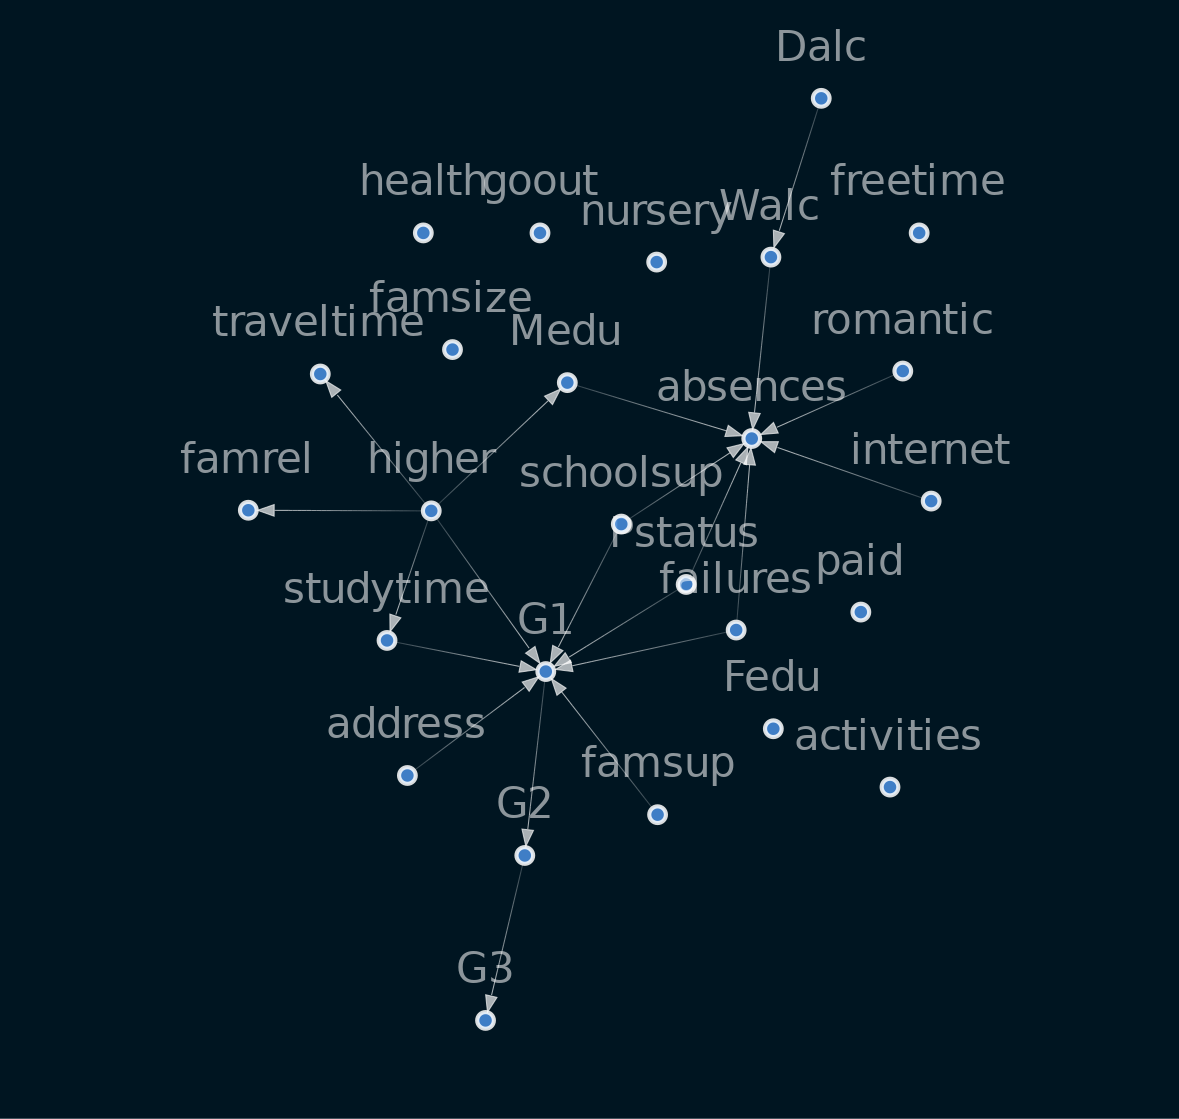

In [11]:
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
sm.remove_edges_below_threshold(0.8)

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [12]:
sm.remove_edge('Pstatus','G1')
sm.remove_edge('address','G1')

/home/ssl/miniconda3/envs/cuda_tf2/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'Pstatus', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/home/ssl/miniconda3/envs/cuda_tf2/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'Pstatus', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


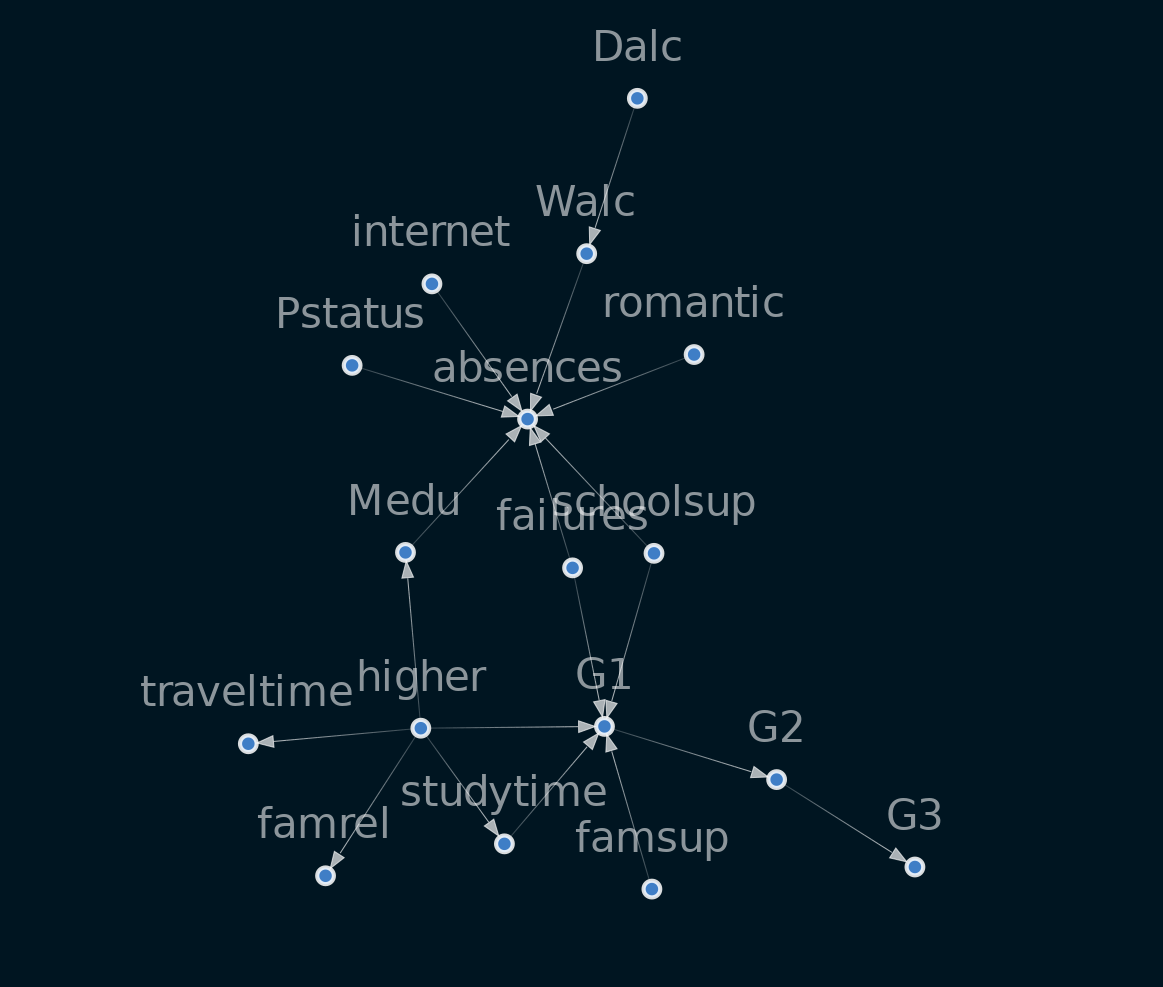

In [13]:
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [14]:
from causalnex.network import BayesianNetwork

bn = BayesianNetwork(sm)

In [38]:
#Reduce Cadinality of categorical features
discretised_data = struct_data.copy()

print(f"Learned DAG Edges: {len(sm.edges)}")
print(f"Learned DAG Nodes: {len(sm.nodes)}")
print(f"Learned DAG Degree View \n: {sm.degree} \n")

# define a map {old_value : new_value} -> use to update the feature
data_vals = {col : struct_data[col].unique() for col in struct_data.columns}

Learned DAG Edges: 19
Learned DAG Nodes: 17
Learned DAG Degree View 
: [('Pstatus', 1), ('Medu', 2), ('traveltime', 1), ('studytime', 2), ('failures', 2), ('schoolsup', 2), ('famsup', 1), ('higher', 5), ('internet', 1), ('romantic', 1), ('famrel', 1), ('Dalc', 1), ('Walc', 2), ('absences', 7), ('G1', 6), ('G2', 2), ('G3', 1)] 



In [41]:
import warnings
from typing import List, Tuple

from causalnex.plots import plot_structure
from causalnex.structure import StructureModel
from IPython.display import Image

warnings.filterwarnings("ignore")  # silence warnings


def plot_pretty_structure(
    g: StructureModel,
    edges_to_highlight: Tuple[str, str],
    default_weight: float = 0.2,
    weighted: bool = False,
):
    """
    Utility function to plot our networks in a pretty format

    Args:
        g: Structure model (directed acyclic graph)
        edges_to_highlight: List of edges to highlight in the plots
        default_weight: Default edge weight
        weighted: Whether the graph is weighted

    Returns:
        a styled pygraphgiz graph that can be rendered as an image
    """
    graph_attributes = {
        "splines": "spline",  # use splies
        "ordering": "out",
        "ratio": "fill",  # control the size of the image
        "size": "16,9!",  # set the size of the final image
        "fontcolor": "#FFFFFFD9",
        "bgcolor": "#1A1B23",
        "fontname": "Helvetica",
        "fontsize": 24,
        "labeljust": "c",
        "labelloc": "c",
        "pad": "1,1",
        "nodesep": 0.8,
        "ranksep": ".5 equally",
    }
    # Making all nodes hexagonal with black coloring
    node_attributes = {
        node: {
            "shape": "hexagon",
            "width": 2.2,
            "height": 2,
            "fillcolor": "#1A1B23",
            "penwidth": "5",
            "color": "#4a90e2d9",
            "fontsize": 20,
            "labelloc": "c",
            "labeljust": "c",
        }
        for node in g.nodes
    }
    # Customising edges
    if weighted:
        edge_weights = [(u, v, w if w else default_weight) for u, v, w in g.edges(data="weight")]
    else:
        edge_weights = [(u, v, default_weight) for u, v in g.edges()]

    edge_attributes = {
        (u, v): {
            "penwidth": w * 10 + 2,  # Setting edge thickness
            "weight": int(w),  # Higher "weight"s mean shorter edges
            "arrowsize": 2 - 2.0 * w,  # Avoid too large arrows
            "arrowtail": "dot",
            "color": "#DF5F00" if ((u, v) in set(edges_to_highlight)) else "#888888",
        }
        for u, v, w in edge_weights
    }
    return plot_structure(
        g,
        prog="dot",
        graph_attributes=graph_attributes,
        node_attributes=node_attributes,
        edge_attributes=edge_attributes,
    )

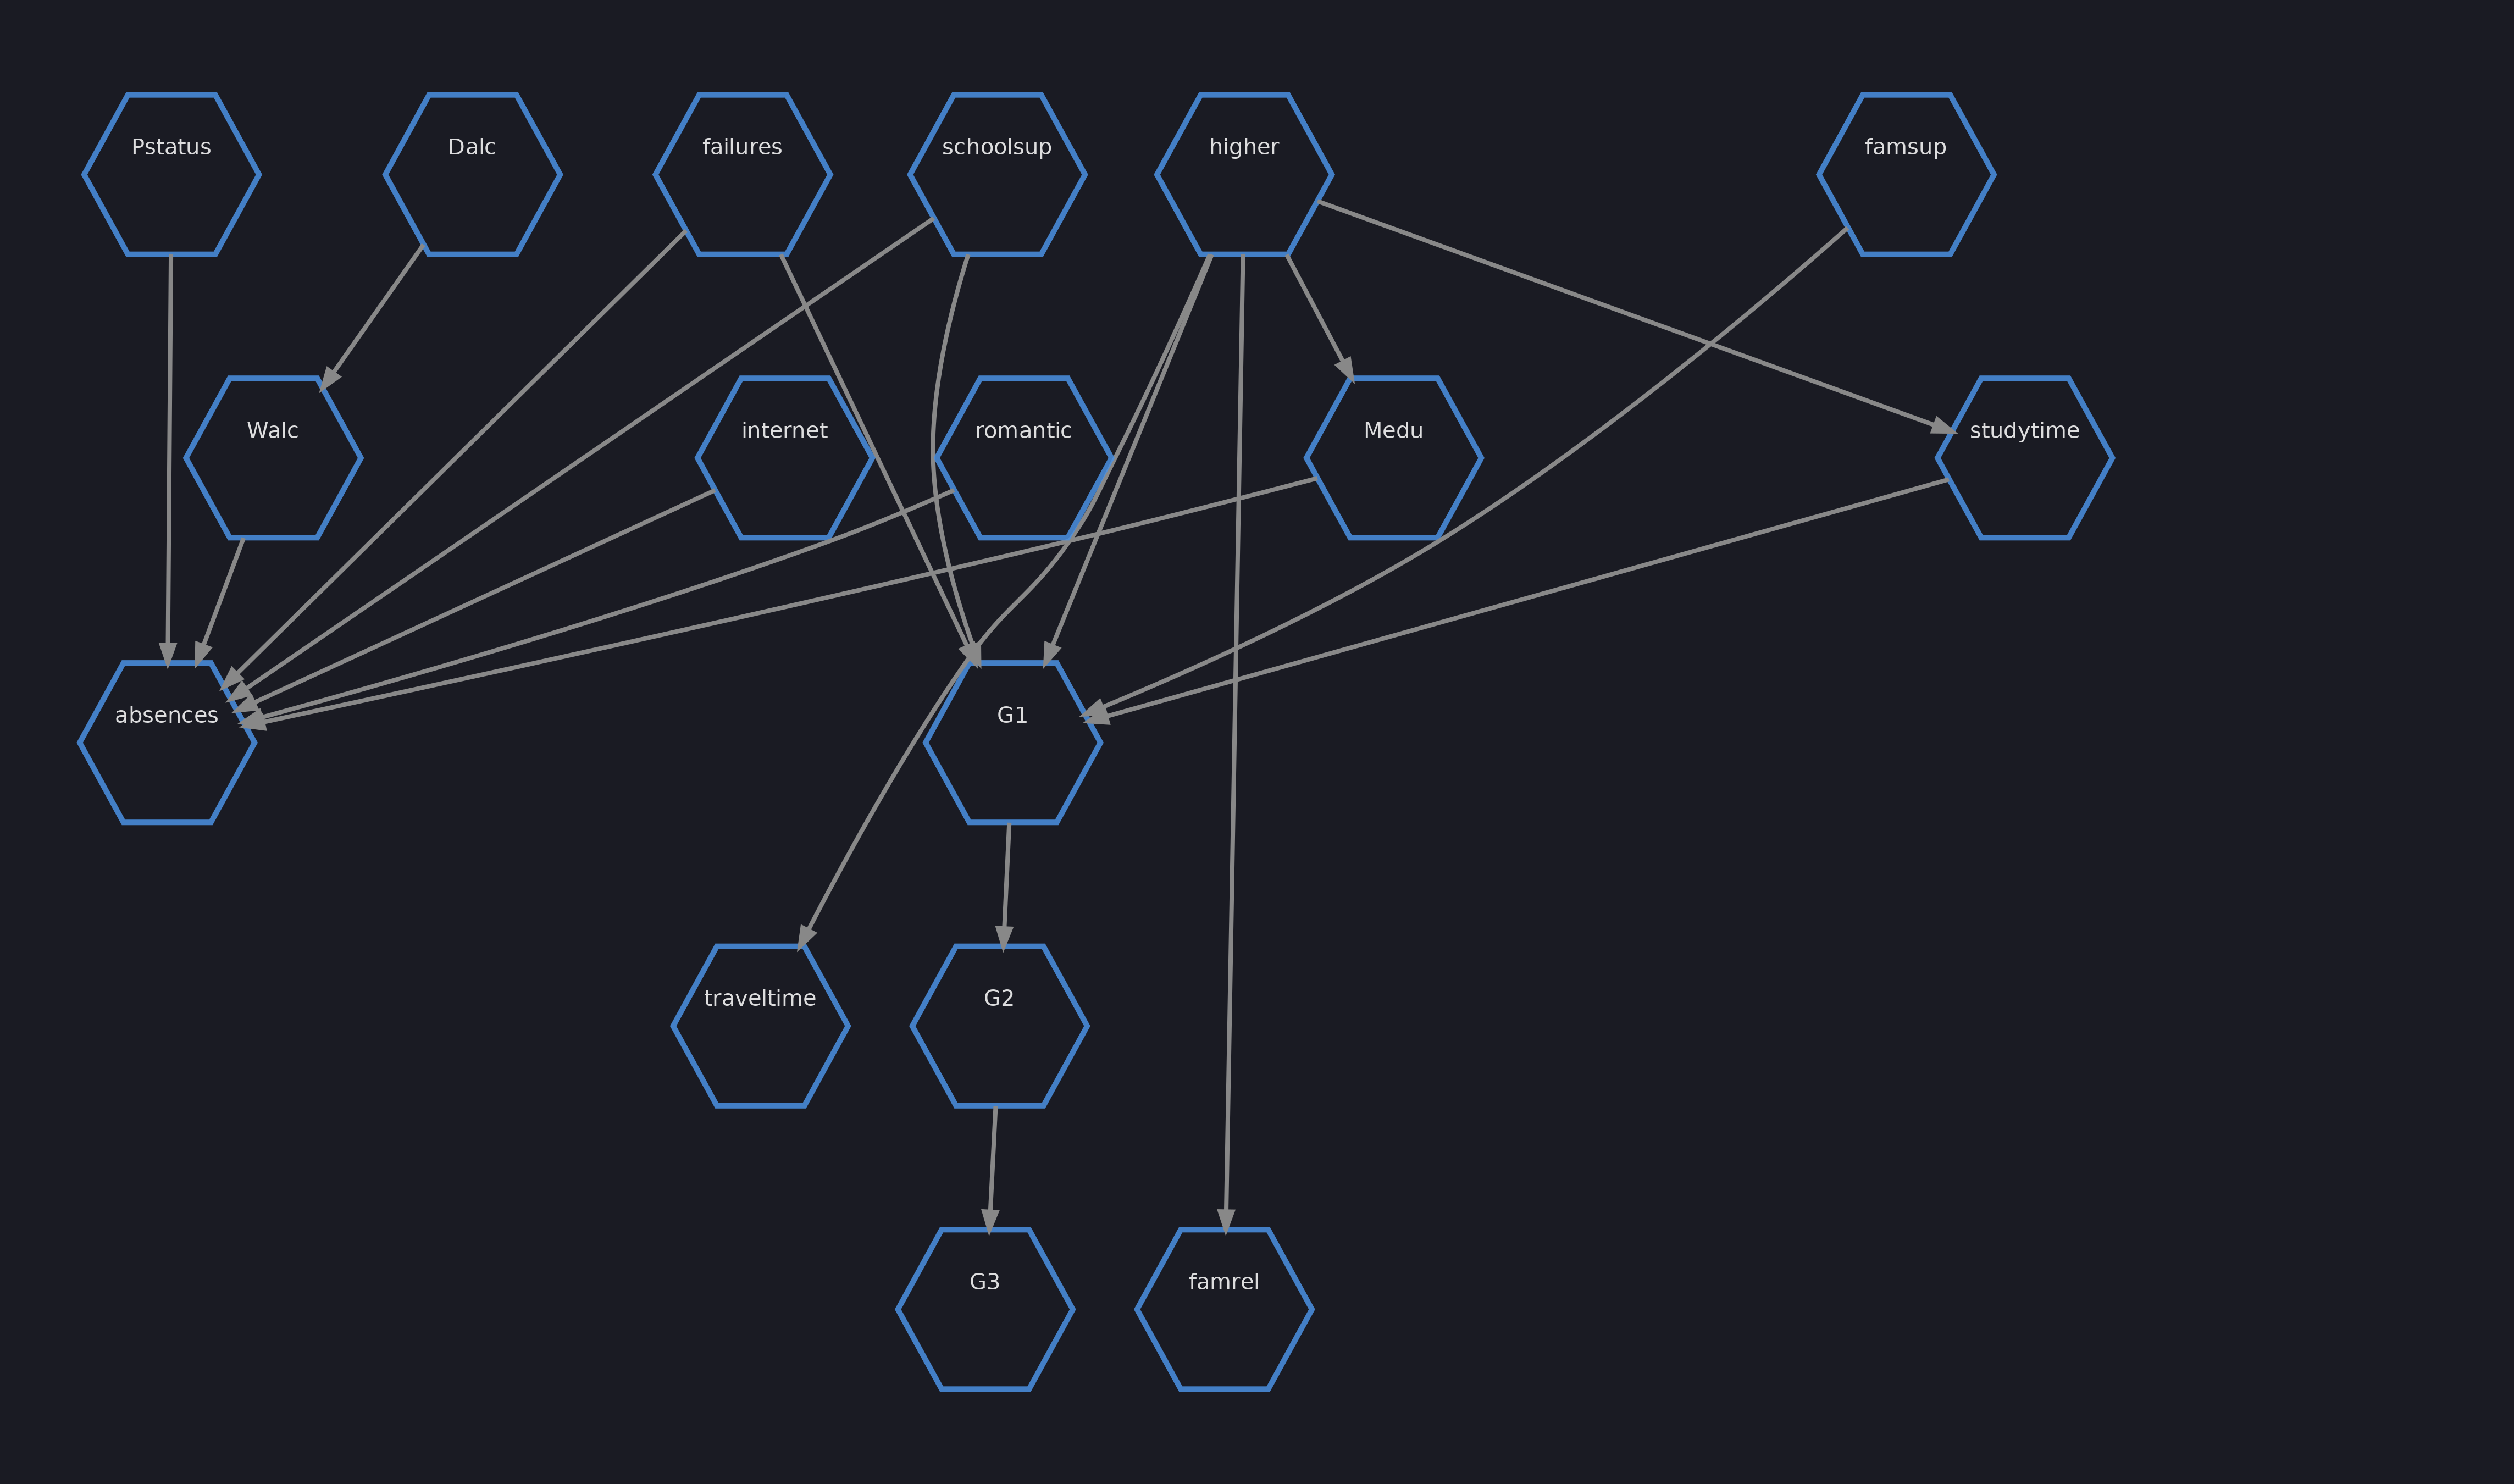

In [43]:
viz = plot_pretty_structure(bn.structure, edges_to_highlight=[])
Image(viz.draw(format='png'))

In [16]:
del_cols = list(discretised_data.columns )
for col in bn.nodes : 
    del_cols.remove(col)
del_cols

['address',
 'famsize',
 'Fedu',
 'paid',
 'activities',
 'nursery',
 'freetime',
 'goout',
 'health']

In [17]:
discretised_data.drop(columns=del_cols,inplace=True)


In [18]:
discretised_data.head()


,Pstatus,Medu,traveltime,studytime,failures,schoolsup,famsup,higher,internet,romantic,famrel,Dalc,Walc,absences,G1,G2,G3
0,0,4,2,2,0,1,0,1,0,0,4,1,1,6,5,6,6
1,1,1,1,2,0,0,1,1,1,0,5,1,1,4,5,5,6
2,1,1,1,2,3,1,0,1,1,0,4,2,3,10,7,8,10
3,1,4,1,3,0,0,1,1,1,1,3,1,1,2,15,14,15
4,1,3,1,2,0,0,1,1,0,0,4,1,2,4,6,10,10


In [19]:
failures_map = {v : 'no-failure' if v==[0]
               else 'have-failure' for v in data_vals['failures']}
studytime_map = {v : 'short-studytime' if v in [1,2]
                else 'long-studytime' for v in data_vals['studytime']}

In [20]:
data_vals


{'address': array([1, 0]),
 'famsize': array([0, 1]),
 'Pstatus': array([0, 1]),
 'Medu': array([4, 1, 3, 2, 0]),
 'Fedu': array([4, 1, 2, 3, 0]),
 'traveltime': array([2, 1, 3, 4]),
 'studytime': array([2, 3, 1, 4]),
 'failures': array([0, 3, 2, 1]),
 'schoolsup': array([1, 0]),
 'famsup': array([0, 1]),
 'paid': array([0, 1]),
 'activities': array([0, 1]),
 'nursery': array([1, 0]),
 'higher': array([1, 0]),
 'internet': array([0, 1]),
 'romantic': array([0, 1]),
 'famrel': array([4, 5, 3, 1, 2]),
 'freetime': array([3, 2, 4, 1, 5]),
 'goout': array([4, 3, 2, 1, 5]),
 'Dalc': array([1, 2, 5, 3, 4]),
 'Walc': array([1, 3, 2, 4, 5]),
 'health': array([3, 5, 1, 2, 4]),
 'absences': array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
        28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17]),
 'G1': array([ 5,  7, 15,  6, 12, 16, 14, 10, 13,  8, 11,  9, 17, 19, 18,  4,  3]),
 'G2': array([ 6,  5,  8, 14, 10, 15, 12, 18, 16, 13,  9, 11,  7, 19, 17,

In [21]:
discretised_data['failures'] = discretised_data['failures'].map(failures_map)
discretised_data['studytime'] = discretised_data['studytime'].map(studytime_map)

In [22]:
from causalnex.discretiser import Discretiser

# absense discretised into buckets : (<1) , (1 to 9), (>= 10)
discretised_data['absences'] = Discretiser(method='fixed',
                                          numeric_split_points=[1,10]).transform(discretised_data['absences'].values)
discretised_data['G1'] = Discretiser(method='fixed',
                                    numeric_split_points=[10]).transform(discretised_data['G1'].values)
discretised_data['G2'] = Discretiser(method='fixed',
                                    numeric_split_points=[10]).transform(discretised_data['G2'].values)
discretised_data['G3'] = Discretiser(method='fixed',
                                    numeric_split_points=[10]).transform(discretised_data['G3'].values)

In [23]:
absences_map = {0: "No-absence", 1: "Low-absence", 2: "High-absence"}
G1_map = {0: "Fail", 1: "Pass"}
G2_map = {0: "Fail", 1: "Pass"}
G3_map = {0: "Fail", 1: "Pass"}

discretised_data["absences"] = discretised_data["absences"].map(absences_map)
discretised_data["G1"] = discretised_data["G1"].map(G1_map)
discretised_data["G2"] = discretised_data["G2"].map(G2_map)
discretised_data["G3"] = discretised_data["G3"].map(G3_map)


In [24]:
# Split 90% train and 10% test
from sklearn.model_selection import train_test_split

train, test = train_test_split(discretised_data, train_size=0.9, random_state=7)

In [44]:
bn = bn.fit_node_states(discretised_data)
bn = bn.fit_cpds(
    train, 
    method="BayesianEstimator",
    bayes_prior="K2",
)

In [46]:
# It is recommended to update the model using the complete dataset for the following type of queries
bn = bn.fit_cpds(
    discretised_data, 
    method="BayesianEstimator", 
    bayes_prior="K2",
)


In [47]:
bn.cpds['G1']

failures          0                                                    \
famsup            0                                                     
higher            0                                                     
schoolsup         0                                       1             
studytime         1         2         3         4         1         2   
G1                                                                      
3          0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
4          0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
5          0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
6          0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
7          0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
8          0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
9          0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
10         0.111111  0.157895  0.058824  0.058824  0.058824  0.058824   
11         0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
12         0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
13         0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
14         0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
15         0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
16         0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
17         0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
18         0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   
19         0.055556  0.052632  0.058824  0.058824  0.058824  0.058824   

failures                                           ...         3            \
famsup                                             ...         1             
higher                                1            ...         0             
schoolsup                             0            ...         1             
studytime         3         4         1         2  ...         3         4   
G1                                                 ...                       
3          0.058824  0.058824  0.018182  0.016949  ...  0.058824  0.058824   
4          0.058824  0.058824  0.018182  0.016949  ...  0.058824  0.058824   
5          0.058824  0.058824  0.018182  0.016949  ...  0.058824  0.058824   
6          0.058824  0.058824  0.054545  0.033898  ...  0.058824  0.058824   
7          0.058824  0.058824  0.036364  0.050847  ...  0.058824  0.058824   
8          0.058824  0.058824  0.109091  0.135593  ...  0.058824  0.058824   
9          0.058824  0.058824  0.036364  0.050847  ...  0.058824  0.058824   
10         0.058824  0.058824  0.072727  0.050847  ...  0.058824  0.058824   
11         0.058824  0.058824  0.072727  0.067797  ...  0.058824  0.058824   
12         0.058824  0.058824  0.072727  0.135593  ...  0.058824  0.058824   
13         0.058824  0.058824  0.109091  0.101695  ...  0.058824  0.058824   
14         0.058824  0.058824  0.090909  0.084746  ...  0.058824  0.058824   
15         0.058824  0.058824  0.036364  0.118644  ...  0.058824  0.058824   
16         0.058824  0.058824  0.072727  0.067797  ...  0.058824  0.058824   
17         0.058824  0.058824  0.072727  0.016949  ...  0.058824  0.058824   
18         0.058824  0.058824  0.090909  0.016949  ...  0.058824  0.058824   
19         0.058824  0.058824  0.018182  0.016949  ...  0.058824  0.058824   

failures                                                                     \
famsup                                                                        
higher        1                                                               
schoolsup     0                                       1                       
studytime     1         2         3         4         1         2         3   
G1                                                                            
3          0.05  0.052632  0.058824  0.058824  0.05

In [27]:
discretised_data.loc[18, discretised_data.columns != 'G1']

Pstatus                     1
Medu                        3
traveltime                  1
studytime     short-studytime
failures         have-failure
schoolsup                   0
famsup                      1
higher                      1
internet                    1
romantic                    0
famrel                      5
Dalc                        2
Walc                        4
absences         High-absence
G2                       Fail
G3                       Fail
Name: 18, dtype: object

In [28]:
predictions = bn.predict(discretised_data, "G1")

In [29]:
print(f"The prediction is '{predictions.loc[18, 'G1_prediction']}'")

The prediction is 'Fail'


In [30]:
print(f"The ground truth is '{discretised_data.loc[18, 'G1']}'")

The ground truth is 'Fail'


In [31]:
from causalnex.evaluation import classification_report

classification_report(bn, test, 'G1')

{'G1_Fail': {'precision': 0.42857142857142855,
  'recall': 0.3333333333333333,
  'f1-score': 0.375,
  'support': 9},
 'G1_Pass': {'precision': 0.8181818181818182,
  'recall': 0.8709677419354839,
  'f1-score': 0.84375,
  'support': 31},
 'accuracy': 0.75,
 'macro avg': {'precision': 0.6233766233766234,
  'recall': 0.6021505376344086,
  'f1-score': 0.609375,
  'support': 40},
 'weighted avg': {'precision': 0.7305194805194806,
  'recall': 0.75,
  'f1-score': 0.73828125,
  'support': 40}}

In [32]:
from causalnex.evaluation import roc_auc

roc, auc = roc_auc(bn, test,'G1')
print(auc)

0.8043750000000001


In [33]:
from causalnex.inference import InferenceEngine

ie = InferenceEngine(bn)
marginals = ie.query()
marginals['G1']

{'Fail': 0.3714407162017957, 'Pass': 0.628559283798204}

In [34]:
marginals_short = ie.query({"studytime": "short-studytime"})
marginals_long = ie.query({"studytime": "long-studytime"})
print("Marginal G1 | Short Studtyime", marginals_short["G1"])
print("Marginal G1 | Long Studytime", marginals_long["G1"])

Marginal G1 | Short Studtyime {'Fail': 0.4158463077730099, 'Pass': 0.5841536922269901}
Marginal G1 | Long Studytime {'Fail': 0.23507432542047818, 'Pass': 0.7649256745795218}


In [35]:
print("distribution before do", ie.query()["higher"])
ie.do_intervention("higher",
                   {1: 1.0,
                    0: 0.0})
print("distribution after do", ie.query()["higher"])

distribution before do {0: 0.056022408963585436, 1: 0.9439775910364143}
distribution after do {0: 0.0, 1: 0.9999999999999997}


In [36]:
ie.reset_do("higher")


In [37]:
print("marginal G1", ie.query()["G1"])
ie.do_intervention("higher",
                   {1: 1.0,
                    0: 0.0})
print("updated marginal G1", ie.query()["G1"])

marginal G1 {'Fail': 0.3714407162017957, 'Pass': 0.6285592837982041}
updated marginal G1 {'Fail': 0.3653368215149739, 'Pass': 0.634663178485026}
